In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from methods.load import load_observations


In [ ]:
I = load_observations('inflow', data_dir='./data/', as_numpy=False)
S = load_observations('storage', data_dir='./data/', as_numpy=False)
R = load_observations('release', data_dir='./data/', as_numpy=False)
I.head()

,prompton,beltzvilleCombined,fewalter,blueMarsh
1945-01-01,<NA>,<NA>,84.004757,<NA>
1945-01-02,<NA>,<NA>,142.161897,<NA>
1945-01-03,<NA>,<NA>,116.314279,<NA>
1945-01-04,<NA>,<NA>,116.314279,<NA>
1945-01-05,<NA>,<NA>,109.852375,<NA>


In [35]:
def get_overlapping_datetime_indices(*dfs):
    """
    Get the indices of the overlapping datetime indices of the input dataframes.
    """
    indices = dfs[0].dropna().index
    for df in dfs[1:]:
        indices = indices.intersection(df.dropna().index)
    return indices

reservoir_name = 'fewalter'
dt = get_overlapping_datetime_indices(I[reservoir_name], 
                                      S[reservoir_name], 
                                      R[reservoir_name],)
dt


DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=2278, freq=None)

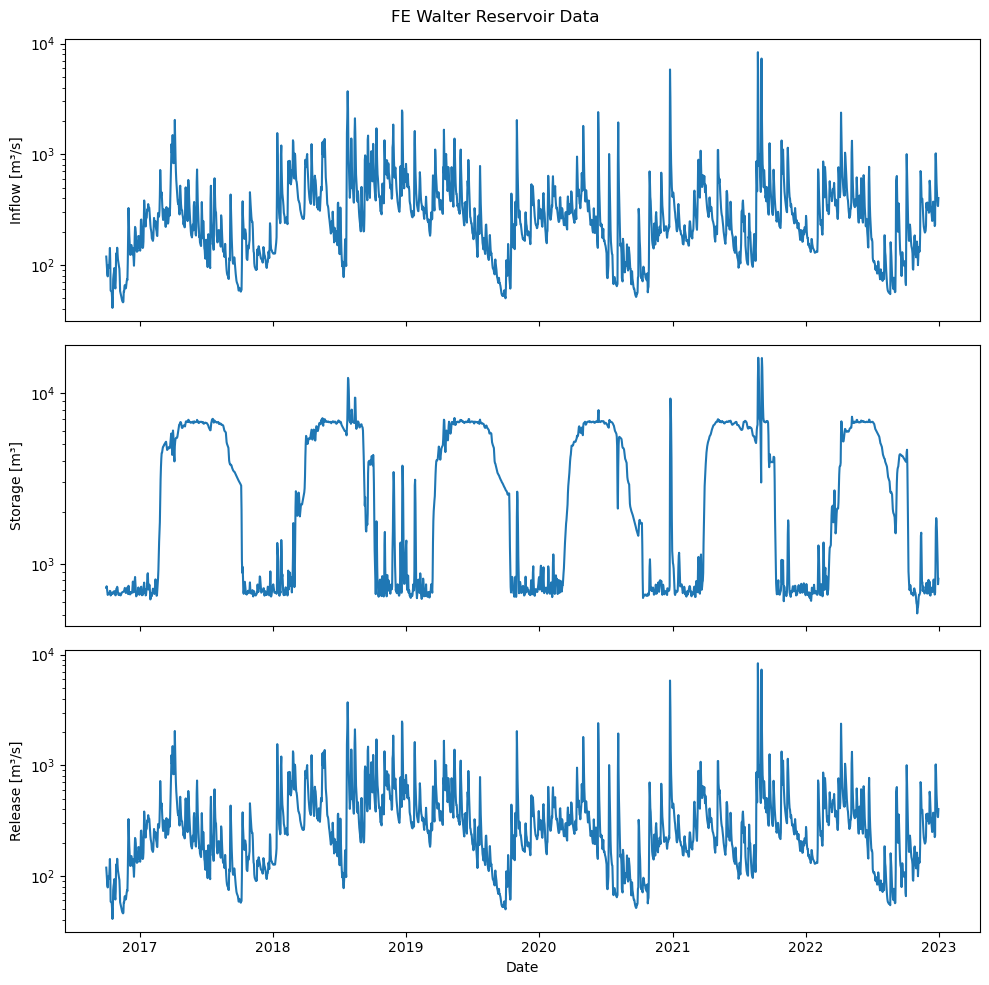

In [36]:
def plot_obs_reservoir_dynamics(I, S, R, reservoir_name, 
                                start_date = None,
                                end_date = None,
                                timescale = 'daily',
                                log=True,
                                fname="reservoir_dynamics.png",
                                title=None):
    
    # subset data
    I = I[[reservoir_name]]
    S = S[[reservoir_name]]
    R = R[[reservoir_name]]
    
    if start_date is not None:
        I = I.loc[start_date:]
        S = S.loc[start_date:]
        R = R.loc[start_date:]
    if end_date is not None:
        I = I.loc[:end_date]
        S = S.loc[:end_date]
        R = R.loc[:end_date]
        
    if timescale == 'monthly':
        I = I.resample('M').sum()
        S = S.resample('M').mean()
        R = R.resample('M').sum()
    elif timescale == 'daily':
        pass
    elif timescale == 'weekly':
        I = I.resample('W').sum()
        S = S.resample('W').mean()
        R = R.resample('W').sum()
    else:
        raise ValueError('timescale must be "daily", "weekly", or "monthly"')
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 10),
                            sharex=True)
    
    axs[0].plot(I.index, I[reservoir_name], label='Inflow')
    axs[0].set_ylabel('Inflow [m³/s]')
    
    axs[1].plot(S.index, S[reservoir_name], label='Storage')
    axs[1].set_ylabel('Storage [m³]')
    
    axs[2].plot(R.index, R[reservoir_name], label='Release')
    axs[2].set_ylabel('Release [m³/s]')
    axs[2].set_xlabel('Date')
    
    if log:
        axs[0].set_yscale('log')
        axs[1].set_yscale('log')
        axs[2].set_yscale('log')
    if title is not None:
        plt.suptitle(title)
        
    plt.tight_layout()
    # plt.savefig(fname)
    plt.show()

plot_obs_reservoir_dynamics(I.loc[dt,:], S.loc[dt,:], R.loc[dt,:], 'fewalter', title='FE Walter Reservoir Data')   

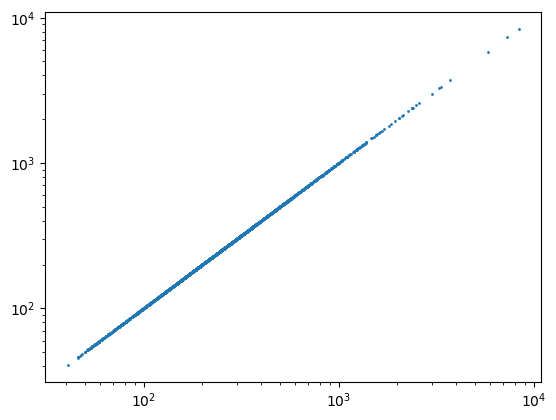

In [37]:
plt.scatter(I.loc[dt, reservoir_name], R.loc[dt, reservoir_name], s=1)
plt.xscale('log')
plt.yscale('log')